### Student Performance Indicator

### Life cycle of Machine Learning Project

  1.Understanding the problem statement
  
  2.Data collection
  
  3.EDA
  
  4.Data Pre-Processing
  
  5.Model Training
  
  6.Choose best model 

### 1) Problem Statement
        
This project understands how the student's performance(test scores)is affected by other variables such as          Gender,Ethnicity,Parantal Level of eductaion, Lunch and Test Preparation course

### 2) Data collection

    Kaggle dataset-----https://www.kaggle.com/code/spscientist/student-performance-in-exams
    the data consist of 8 columns and 1000 rows

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv('data\stud.csv')

In [3]:
dataset.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### 3. EDA(Exploratory Data Analysis)

1. Finding NULL values

2. Check Duplicate values

3. Categorical features

4. relation between dependent and independent features

5. outliers

In [4]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\seruvuri\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\seruvuri\AppData\Local\Temp\ipykernel_10320\1945361605.py", line 3, in <cell line: 3>
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
NameError: name 'X' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\seruvuri\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\seruvuri\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\co

TypeError: object of type 'NoneType' has no len()

#### 3.1 NUll Values

In [5]:
#finding null values
dataset.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

#### Observations 

***There is no missing values***

### 3.2 Check Duplicate values

In [6]:
dataset.duplicated().sum()

0

#### Observations 

***No duplicate values***

### 3.3 Check data types

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 3.4 Checking the number of unique value of each column

In [8]:
dataset.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### 3.5 checking statistics of dataset

In [9]:
dataset.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Insight
    
    1.From the above description of  numerical data, all means are very close to each other - between 66 and 68.05
    
    2.All standard deviations are also close between 14.6 and 15.19,
    
    3.While there is a minimum score 0 for math, for writing minimum is much higher =10 and for reading the score is  =17

### 3.7 Exploring more data

In [10]:
print("categories in 'gender' variable:   ",end=" ")
print(dataset['gender'].unique())


print("categories in 'race_ethnicity' variable:   ",end=" ")
print(dataset['race_ethnicity'].unique())


print("categories in 'parental_level_of_education' variable:   ",end=" ")
print(dataset['parental_level_of_education'].unique())


print("categories in 'lunch' variable:   ",end=" ")
print(dataset['lunch'].unique())


print("categories in 'test_preparation_course' variable:   ",end=" ")
print(dataset['test_preparation_course'].unique())

categories in 'gender' variable:    ['female' 'male']
categories in 'race_ethnicity' variable:    ['group B' 'group C' 'group A' 'group D' 'group E']
categories in 'parental_level_of_education' variable:    ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categories in 'lunch' variable:    ['standard' 'free/reduced']
categories in 'test_preparation_course' variable:    ['none' 'completed']


In [11]:
# define numerical and categorical features

numerical_features=[feature for feature in dataset.columns if dataset[feature].dtype !='O']
categorical_features=[feature for feature in dataset.columns if dataset[feature].dtype =='O']

# print columns
print('we have {} numerical features: {}'.format(len(numerical_features),numerical_features))
print('we have {} categorical features: {}'.format(len(categorical_features),categorical_features))

we have 3 numerical features: ['math_score', 'reading_score', 'writing_score']
we have 5 categorical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


### 3.8 Adding columns for " Total Score" and "Average"

In [12]:
dataset['Total_score']=dataset['math_score']+dataset['reading_score']+dataset['writing_score']
dataset['Average']=dataset['Total_score']/3
dataset.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [13]:
reading_full=dataset[dataset['reading_score']==100]['Average'].count()
writing_full=dataset[dataset['writing_score']==100]['Average'].count()
math_full=dataset[dataset['math_score']==100]['Average'].count()

print(f"Number of students with full marks in Maths: {math_full}")
print(f"Number of students with full marks in Reading: {reading_full}")
print(f"Number of students with full marks in writing: {writing_full}")

Number of students with full marks in Maths: 7
Number of students with full marks in Reading: 17
Number of students with full marks in writing: 14


In [14]:
reading_less_20=dataset[dataset['reading_score']<=20]['Average'].count()
writing_less_20=dataset[dataset['writing_score']<=20]['Average'].count()
math_less_20=dataset[dataset['math_score']<=20]['Average'].count()

print(f"Number of students with less than 20 marks in reading: {reading_less_20}")
print(f"Number of students with less than 20 marks in writing: {writing_less_20}")
print(f"Number of students with less than 20 marks in maths: {math_less_20}")


Number of students with less than 20 marks in reading: 1
Number of students with less than 20 marks in writing: 3
Number of students with less than 20 marks in maths: 4


#### Observations

   ***From above values we get students have performed the worst in maths***
   
   ***Best performance is reading section*** 

### 4. Exploring Data(Visualization)

#### 4.1 Visualize average score distribution to make some conclusion

     1. Histogram
     
     2.kernal Distribution Function(KDE)

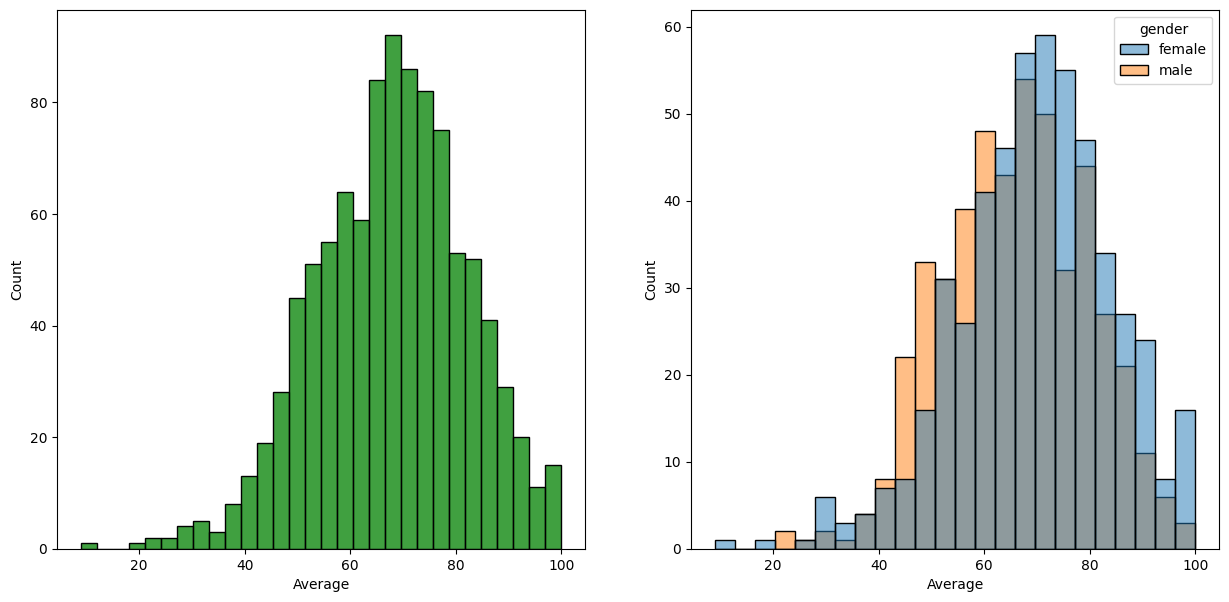

In [15]:
fig, axs=plt.subplots(1, 2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=dataset,x='Average',bins=30,color='g')
plt.subplot(122)
sns.histplot(data=dataset,x='Average',hue='gender')
plt.show()

#### Insights

***Female students tend to perform well than Male students***


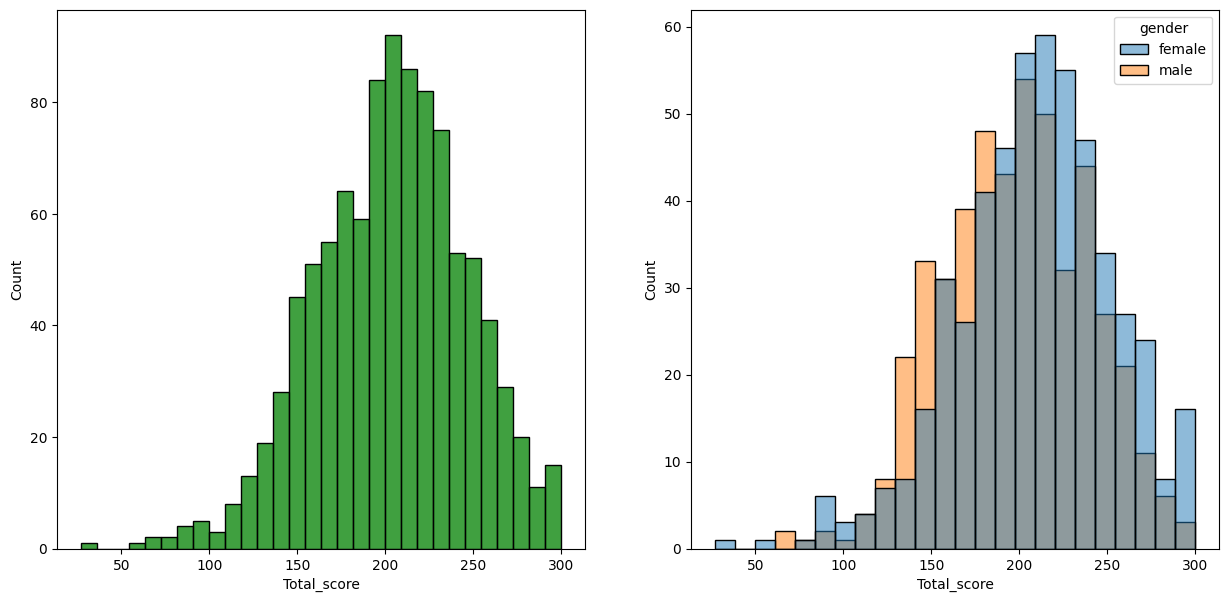

In [16]:
fig, axs=plt.subplots(1, 2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=dataset,x='Total_score',bins=30,color='g')
plt.subplot(122)
sns.histplot(data=dataset,x='Total_score',hue='gender')
plt.show()